# Connect Dropbox to ggc

In [1]:
!git clone https://github.com/thatbrguy/Dropbox-Uploader.git

Cloning into 'Dropbox-Uploader'...
remote: Enumerating objects: 951, done.
remote: Total 951 (delta 0), reused 0 (delta 0), pack-reused 951
Receiving objects: 100% (951/951), 309.20 KiB | 8.14 MiB/s, done.
Resolving deltas: 100% (505/505), done.


In [2]:
%cd Dropbox-Uploader

/content/Dropbox-Uploader


In [0]:
# This line is needed when running dropbox for the first time
# !chmod +x dropbox_uploader.sh

In [4]:
!bash dropbox_uploader.sh


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader128182445029684)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt



In [0]:
!echo "wJ_6mGNSd_AAAAAAAAAAQJrzkjASK_8wmDgYeI_WmkvIDbszvbnfL5qFDN76pHy7" > token.txt

In [6]:
!bash dropbox_uploader.sh


 This is the first time you run this script, please follow the instructions:

 1) Open the following URL in your Browser, and log in using your account: https://www.dropbox.com/developers/apps
 2) Click on "Create App", then select "Dropbox API app"
 3) Now go on with the configuration, choosing the app permissions and access restrictions to your DropBox folder
 4) Enter the "App Name" that you prefer (e.g. MyUploader183302751525528)

 Now, click on the "Create App" button.

 When your new App is successfully created, please click on the Generate button
 under the 'Generated access token' section, then execute the following command:

 echo "INPUT_YOUR_ACCESS_TOKEN_HERE" > token.txt


 Found token.txt with access token: wJ_6mGNSd_AAAAAAAAAAQJrzkjASK_8wmDgYeI_WmkvIDbszvbnfL5qFDN76pHy7

 You can unlink this account if the token is wrong, using:
 ./dropbox-uploader.sh unlink

 The configuration has been saved.


In [7]:
! ./dropbox_uploader.sh download dataset.zip

 > Downloading "/dataset.zip" to "/content/Dropbox-Uploader/dataset.zip"... DONE


#Import extra library region

In [8]:
import cv2
import os
import numpy as np
import tensorflow as tf
import zipfile 

from importlib import reload

from keras import backend as K
from keras import optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import MaxPooling2D, Conv2D
from keras.utils import np_utils

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#Setting backend to theano
def set_keras_backend(backend):

    if K.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        reload(K)
        assert K.backend() == backend

set_keras_backend("theano")

Using TensorFlow backend.
Using Theano backend.


# Unzipping file

In [0]:
src_path = './dataset.zip'
extract_path = './dataset'

zip_ref = zipfile.ZipFile(src_path, 'r')
zip_ref.extractall(extract_path)
zip_ref.close()

In [10]:
#access to data's folder
%cd /content/Dropbox-Uploader/dataset


/content/Dropbox-Uploader/dataset


In [0]:
#access to unzip folder 
dog_list = ['bullmastiff', 'chowchow', 'pug', 'maltese', 'huskysibir',
           'dachshund', 'dalmatian', 'corgi', 'chihuahua', 'yorkshire']

#label it
train_sample = []
train_label = []

#get data and fit to array
for index in range(len(dog_list)):
  dogname_path = './' + dog_list[index]
  
  for img_name in os.listdir(dogname_path):
    img_path = dogname_path + '/' + img_name
    train_sample.append(cv2.resize(cv2.imread(img_path), (224,224)))
    train_label.append(index)

# Preprocess the data

In [0]:
train_sample, valid_sample, train_label, valid_label = train_test_split(train_sample, train_label, test_size=0.2, random_state=42)

train_sample = np.array(train_sample)
train_label = np.array(train_label)
valid_sample = np.array(valid_sample)
valid_label = np.array(valid_label)

train_sample = train_sample.reshape(train_sample.shape[0], 224, 224, 3)
valid_sample = valid_sample.reshape(valid_sample.shape[0], 224, 224, 3)

train_sample = train_sample.astype('float32')
valid_sample = valid_sample.astype('float32')

train_sample /= 255
valid_sample /= 255

train_label = np_utils.to_categorical(train_label, 10)
valid_label = np_utils.to_categorical(valid_label, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


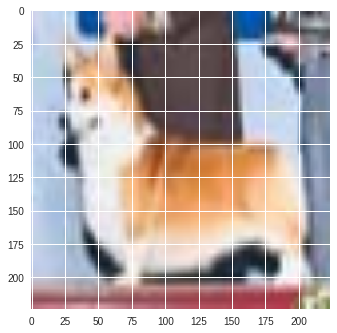

In [13]:
#test image data
k = train_sample.reshape(train_sample.shape[0], 224, 224, 3)
plt.imshow(cv2.cvtColor(train_sample[666], cv2.COLOR_BGR2RGB))
print(train_label[666])

#Self-Building Model Architecture

In [0]:
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

# model.add(Flatten())
# model.add(Dense(4096))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dense(10))
# model.add(Activation('softmax'))


In [0]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [0]:
# model.summary()

**Saving checkpoint  - optional** 

This method is unable to used due to low disk on drive

In [0]:
# create checkpoint path
# checkpoint_path = "training_1/cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create checkpoint callback
# cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
#                                                  save_weights_only=True,
#                                                  verbose=1)

# model.fit(train_sample,
#           train_label,
#           batch_size=32,
#           epochs=10,
#           validation_data=(valid_sample, valid_label),
#           shuffle=True,
#           verbose=1,
#           callbacks = [cp_callback])

**Fitting with common method**

In [0]:
# model.fit(train_sample,
#           train_label,
#           batch_size=32,
#           epochs=10,
#           validation_data=(valid_sample, valid_label),
#           shuffle=True,
#           verbose=1)

# VGG16 model architecture



In [18]:
sample_model = VGG16(weights='imagenet', input_shape=(224,224,3), include_top=False)
sample_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool

In [21]:
#add extra layers to fit with the input
extra_model = Sequential()
extra_model.add(Flatten(input_shape=sample_model.output_shape[1:]))
extra_model.add(Dense(1024, activation='relu'))
extra_model.add(Dense(256, activation='relu'))
extra_model.add(Dense(10, activation='softmax'))

#make a funsion 
model = Model(inputs=sample_model.input, outputs=extra_model(sample_model.output))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
#Fiting model
model.fit(train_sample,
          train_label,
          batch_size=32,
          epochs=4,
          validation_data=(valid_sample, valid_label),
          shuffle=True,
          verbose=1)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 9708 samples, validate on 2427 samples
Epoch 1/4
6336/9708 [==================>...........] - ETA: 2:13:55 - loss: 1.6215 - acc: 0.4446